<a href="https://colab.research.google.com/github/sonichandni/Fashion-MNIST-model-with-Tensorflow-2.0/blob/master/FationMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
len(train_labels)

60000

In [39]:
len(train_labels)

60000

In [40]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [41]:
test_images.shape

(10000, 28, 28)

In [42]:
len(test_labels)

10000

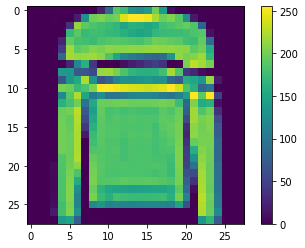

In [43]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

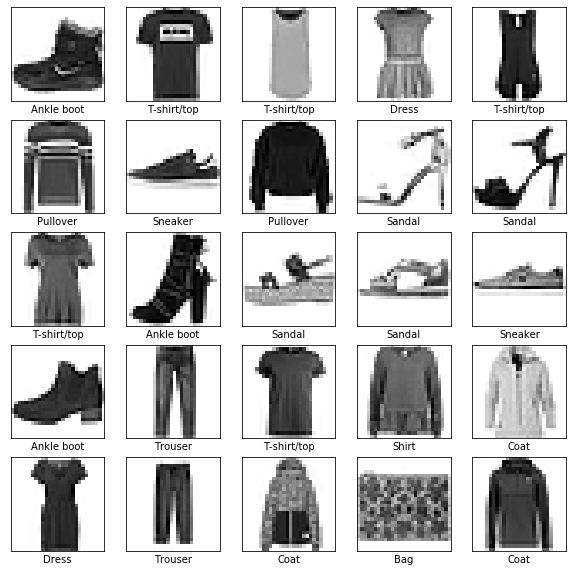

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4947 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3744 - accuracy: 0.8646
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3330 - accuracy: 0.8788
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3092 - accuracy: 0.8868
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2928 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2786 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2661 - accuracy: 0.9014
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2551 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2458 - accuracy: 0.9075
Epoch 10/10
60

In [49]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2976 - accuracy: 0.8833

Test accuracy: 0.8833


In [0]:
predictions = model.predict(test_images)

In [51]:
predictions[0]

array([1.4710673e-08, 3.4662814e-11, 2.0477193e-11, 9.8215658e-11,
       1.6331954e-10, 4.7564688e-03, 1.9524341e-08, 1.6674832e-03,
       5.3346380e-08, 9.9357599e-01], dtype=float32)

In [52]:
np.argmax(predictions[0])

9

In [53]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

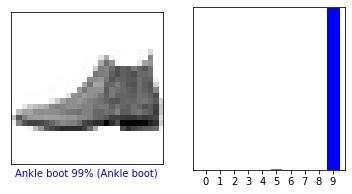

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

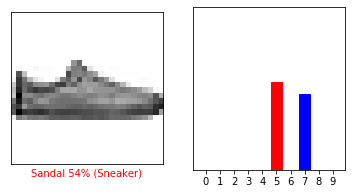

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

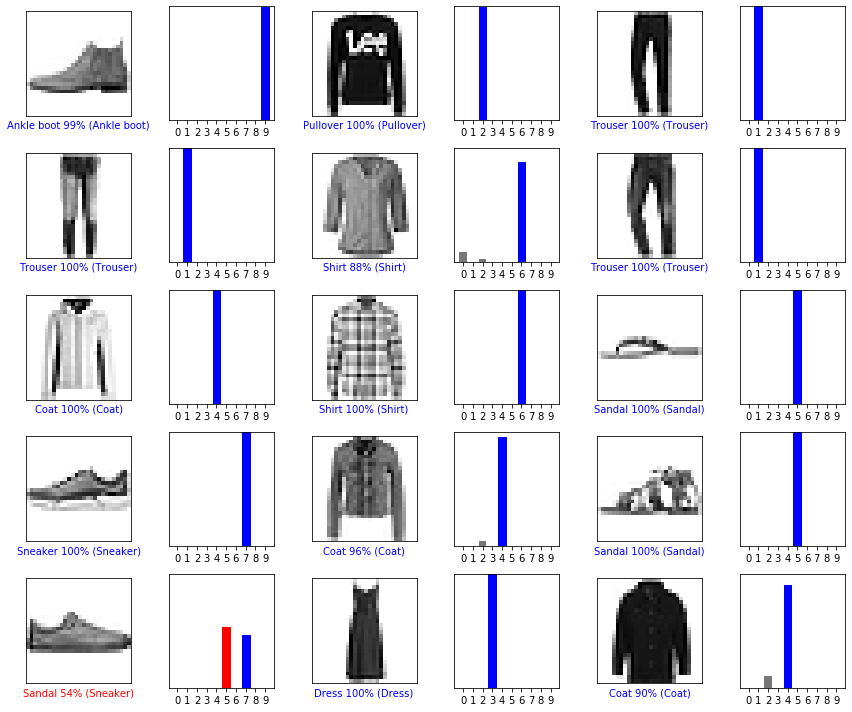

In [65]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [58]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [59]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [60]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.9948468e-06 2.5400331e-15 9.9872905e-01 2.0635717e-11 1.2445971e-03
  2.5658281e-13 2.2434519e-05 1.3887982e-14 3.6788284e-10 2.7432329e-14]]


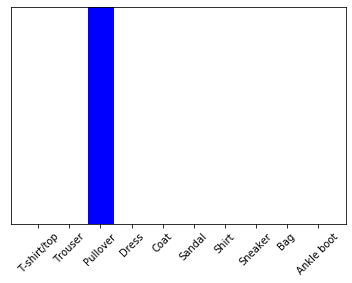

In [61]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [62]:
np.argmax(predictions_single[0])

2